In [2]:
from datasets import load_dataset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import seaborn as sns

c:\Users\PC\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
dataset = load_dataset('Stanford/wikitablequestions')
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['id', 'question', 'answers', 'table'],
        num_rows: 11321
    })
    test: Dataset({
        features: ['id', 'question', 'answers', 'table'],
        num_rows: 4344
    })
    validation: Dataset({
        features: ['id', 'question', 'answers', 'table'],
        num_rows: 2831
    })
})


In [4]:
train_data = dataset['train']
validation_data = dataset['validation']
test_data = dataset['test']
print(train_data[0])
for f in train_data.features:
    print(f)


{'id': 'nt-0', 'question': 'what was the last year where this team was a part of the usl a-league?', 'answers': ['2004'], 'table': {'header': ['Year', 'Division', 'League', 'Regular Season', 'Playoffs', 'Open Cup', 'Avg. Attendance'], 'rows': [['2001', '2', 'USL A-League', '4th, Western', 'Quarterfinals', 'Did not qualify', '7,169'], ['2002', '2', 'USL A-League', '2nd, Pacific', '1st Round', 'Did not qualify', '6,260'], ['2003', '2', 'USL A-League', '3rd, Pacific', 'Did not qualify', 'Did not qualify', '5,871'], ['2004', '2', 'USL A-League', '1st, Western', 'Quarterfinals', '4th Round', '5,628'], ['2005', '2', 'USL First Division', '5th', 'Quarterfinals', '4th Round', '6,028'], ['2006', '2', 'USL First Division', '11th', 'Did not qualify', '3rd Round', '5,575'], ['2007', '2', 'USL First Division', '2nd', 'Semifinals', '2nd Round', '6,851'], ['2008', '2', 'USL First Division', '11th', 'Did not qualify', '1st Round', '8,567'], ['2009', '2', 'USL First Division', '1st', 'Semifinals', '3rd

In [5]:
for example in train_data:
    print("Question:", example['question'])
    print("Table:", example['table'])
    print("Answers:", example['answers'])
    break


Question: what was the last year where this team was a part of the usl a-league?
Table: {'header': ['Year', 'Division', 'League', 'Regular Season', 'Playoffs', 'Open Cup', 'Avg. Attendance'], 'rows': [['2001', '2', 'USL A-League', '4th, Western', 'Quarterfinals', 'Did not qualify', '7,169'], ['2002', '2', 'USL A-League', '2nd, Pacific', '1st Round', 'Did not qualify', '6,260'], ['2003', '2', 'USL A-League', '3rd, Pacific', 'Did not qualify', 'Did not qualify', '5,871'], ['2004', '2', 'USL A-League', '1st, Western', 'Quarterfinals', '4th Round', '5,628'], ['2005', '2', 'USL First Division', '5th', 'Quarterfinals', '4th Round', '6,028'], ['2006', '2', 'USL First Division', '11th', 'Did not qualify', '3rd Round', '5,575'], ['2007', '2', 'USL First Division', '2nd', 'Semifinals', '2nd Round', '6,851'], ['2008', '2', 'USL First Division', '11th', 'Did not qualify', '1st Round', '8,567'], ['2009', '2', 'USL First Division', '1st', 'Semifinals', '3rd Round', '9,734'], ['2010', '2', 'USSF D-2 

Distribution des longueurs de questions, reponses..
<br>
categories  ou types de donnees dominantes

In [6]:
# Comptez les catégories de questions
question_lengths = [len(example['question'].split()) for example in dataset['train']]
print("Longueur moyenne des questions:", sum(question_lengths) / len(question_lengths))


Longueur moyenne des questions: 9.999293348644112


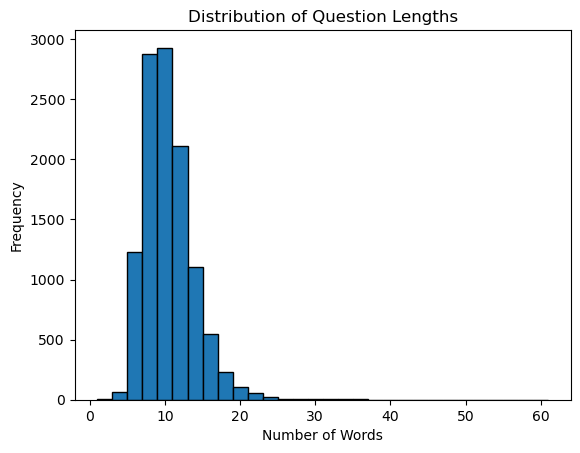

In [7]:
# Extract question lengths
question_lengths = [len(q.split()) for q in train_data['question']]

# Visualize distribution
plt.hist(question_lengths, bins=30, edgecolor='black')
plt.title("Distribution of Question Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


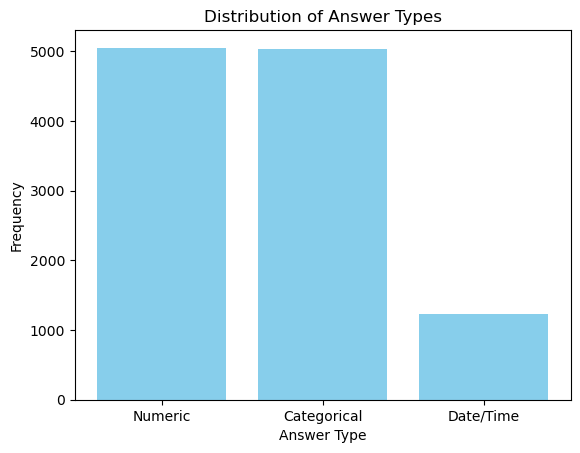

In [8]:
# Analyze answer types
def classify_answer(answer):
    try:
        float(answer[0])  # Check if the answer is numeric
        return 'Numeric'
    except ValueError:
        if any(char.isdigit() for char in answer[0]):
            return 'Date/Time'
        return 'Categorical'

answer_types = [classify_answer(a) for a in train_data['answers']]
answer_counts = Counter(answer_types)

# Visualize answer types
plt.bar(answer_counts.keys(), answer_counts.values(), color='skyblue')
plt.title("Distribution of Answer Types")
plt.xlabel("Answer Type")
plt.ylabel("Frequency")
plt.show()


In [9]:
# Extract examples classified as 'Date/Time'
date_time_examples = [
    answer for answer in train_data['answers'] if classify_answer(answer) == 'Date/Time'
]

# Display a few examples
print("Examples of 'Date/Time' answers:")
for i, example in enumerate(date_time_examples[:10]):  # Show the first 10 examples
    print(f"{i + 1}: {example}")


Examples of 'Date/Time' answers:
1: ['1999-2000']
2: ['KM-45 Series']
3: ['459,640']
4: ['1 year']
5: ['10,000 m']
6: ['Rifle 1889']
7: ['2:37.70']
8: ['5,000 m']
9: ["Men's 25 m rapid fire pistol"]
10: ['Toronto 228th Battalion']


In [10]:
from wordcloud import STOPWORDS

def most_common_words(text, n):
    words = [word for word in text.split() if word.lower() not in STOPWORDS]
    word_counts = Counter(words)
    return word_counts.most_common(n)

all_questions = " ".join(train_data['question'])
most_common_words(all_questions, 10)


[('many', 2960),
 ('number', 1507),
 ('total', 939),
 ('first', 798),
 ('least', 623),
 ('last', 569),
 ('year', 545),
 ('team', 518),
 ('name', 427),
 ('listed', 417)]

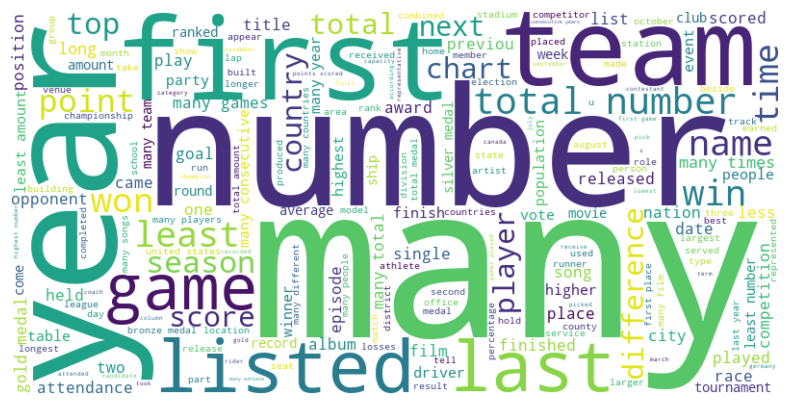

In [11]:
from wordcloud import WordCloud

all_questions = " ".join(train_data['question'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_questions)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


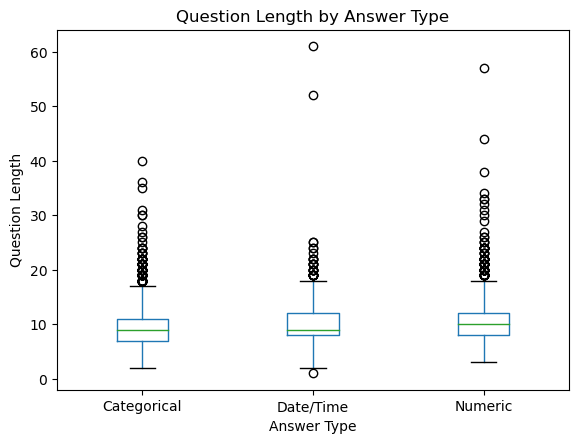

In [12]:
# Combine question lengths and answer types
data = pd.DataFrame({
    'question_length': question_lengths,
    'answer_type': answer_types
})

# Boxplot of question lengths by answer type
data.boxplot(column='question_length', by='answer_type', grid=False)
plt.title("Question Length by Answer Type")
plt.suptitle("")  # Suppress default title
plt.xlabel("Answer Type")
plt.ylabel("Question Length")
plt.show()


Entrer en détail des questions : 

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
question_words = {"what", "which", "who", "whom", "whose", "when", "where", "why", "how"}
stop_words_question = stop_words - question_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
questions = train_data['question']

def preprocess(question):
    words = [word for word in question.split() if word.lower() not in stop_words_question]
    return " ".join(words) #word for word in tokens if word not in stop_words])

processed_q = [preprocess(q) for q in questions]
for i in range(10):
    print(processed_q[i])

what last year where team part usl a-league?
what city piotr's last 1st place finish occur?
who opponent first game season?
how many people stayed least 3 years office?
who first away team chart
which deeper, lake tuz lake palas tuzla?
how many times italian cyclist win round?
what first venue asian games?
what difference number temples imabari matsuyama?
what year keene class aa?


In [15]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(processed_q)

similarity = cosine_similarity(X)
similarity_df = pd.DataFrame(similarity, columns=questions, index=questions)
similarity_df.describe()

,what was the last year where this team was a part of the usl a-league?,in what city did piotr's last 1st place finish occur?,who was the opponent in the first game of the season?,how many people stayed at least 3 years in office?,who is the first away team on the chart,"which is deeper, lake tuz or lake palas tuzla?",how many times did an italian cyclist win a round?,what was the first venue for the asian games?,what is the difference in the number of temples between imabari and matsuyama?,what was the only year keene won class aa?,...,what is the total prize money for the contestants from california?,what is the total number of times pancho carter finished the indy 500 in the top 10>?,which team earned the least amount of points in the apertura 2003 standings?,"who had more tosses, adamson or pup stars?","how many senators were replaced between december 25, 1976, and january 2, 1977?",which competition has the highest meters listed?,how many races were there on the chart?,who came in last?,japan finished below how many countries?,what entrant has the most drivers?
count,11321.000000,11321.000000,11321.000000,11321.000000,11321.000000,11321.000000,11321.000000,11321.000000,11321.000000,11321.000000,...,11321.000000,11321.000000,11321.000000,11321.000000,11321.000000,11321.000000,11321.000000,11321.000000,11321.000000,11321.000000
mean,0.022600,0.016319,0.027941,0.024554,0.025597,0.004316,0.021419,0.022155,0.013654,0.010798,...,0.013701,0.020431,0.019512,0.004662,0.012039,0.018862,0.030521,0.022879,0.024153,0.011159
std,0.045171,0.038177,0.069506,0.044215,0.059380,0.016143,0.041535,0.044556,0.026628,0.024480,...,0.032065,0.035976,0.044771,0.018652,0.027278,0.045582,0.059028,0.064425,0.050365,0.027373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.023005,0.017970,0.000000,0.045455,0.000000,0.000000,0.039943,0.027971,0.019351,0.017546,...,0.019354,0.024765,0.022326,0.000000,0.025275,0.024226,0.064056,0.000000,0.049011,0.023253
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


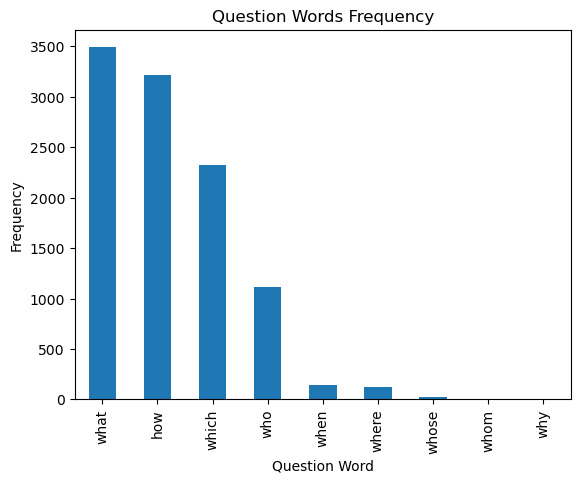

In [16]:
#counting how many times a question word appeared in the questions
question_words_count = Counter([word for question in questions for word in question.split() if word.lower() in question_words])
question_words_count = pd.Series(question_words_count).sort_values(ascending=False)
question_words_count.plot(kind='bar')
plt.title("Question Words Frequency")
plt.xlabel("Question Word")
plt.ylabel("Frequency")
plt.show()


In [22]:
def extract_unique_headers(dataset):
    column_set = set()
    for sample in dataset:
        table = sample.get("table")
        if table and "header" in table:
            column_set.update(table["header"])
    return column_set

# Get unique header
unique_headers = extract_unique_headers(train_data)

# Display results
print(f"Number of unique table header: {len(unique_headers)}")

Number of unique table header: 3051


In [ ]:
# plt.figure(figsize=(8, 6))
# sns.heatmap(similarity_df, annot=True, cmap='Blues', fmt=".2f")
# plt.title("Question Similarity Matrix")
# plt.show()

KeyboardInterrupt: 